In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
# Standard plotly imports
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
#import cufflinks
#import cufflinks as cf
import plotly.figure_factory as ff
import datetime
# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
#cufflinks.go_offline(connected=True)

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
# from xgboost import XGBClassifier
# import xgboost as xgb

## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial

import os
import gc
from tqdm import tqdm
print(os.listdir("../input/ieee-fraud-detection"))

['test_identity.csv', 'sample_submission.csv', 'train_identity.csv', 'train_transaction.csv', 'test_transaction.csv']


In [2]:
# # Bad Transaction 처리 : uid5 기준으로 100% isFraud 였던 애들 처리하기
# lst = os.listdir("../input/badtrans")
# bad= pd.read_csv('../input/badtrans/%s'%lst[0],index_col = 'TransactionID')
# lst = os.listdir("../input/submit2")
# submission= pd.read_csv('../input/submit2/%s'%lst[0],index_col = 'TransactionID')
# tst = pd.merge(submission,bad, how ='left', left_index=True,right_index=True)
# # tst[tst['isFraud_y']>0]
# # tst['isFraud'] = tst['isFraud_y']
# # tst['isFraud']= tst['isFraud'].fillna(tst['isFraud_x'])
# # tst[tst['isFraud_y']>0]
# # tst=tst.drop(['isFraud_x','isFraud_y'], axis =1)
# # submission = tst
# # submission.to_csv('submission.csv')
# idx=tst[tst['isFraud_y']>0][tst['isFraud_x']>0.4].index
# tst['isFraud']= tst.apply(lambda x : 0.99 if x['isFraud_y']>0 and x['isFraud_x']>0.4  else  np.nan, axis =1)
# tst['isFraud']= tst['isFraud'].fillna(tst['isFraud_x'])
# tst['isFraud'].value_counts()
# tst=tst.drop(['isFraud_x','isFraud_y'], axis =1)
# submission = tst
# submission.to_csv('submission.csv')

In [3]:
os.listdir("../input/dropsomecol")

['submission (5).csv',
 'submission (6).csv',
 'importance_190901.csv',
 'submission (4).csv',
 'submission (3).csv',
 'submission (1).csv']

In [4]:
lst = os.listdir("../input/dropsomecol")
lst.remove('importance_190901.csv')

predict = []
for i in range(len(lst)):
    predict.append(list(pd.read_csv("../input/dropsomecol/%s"%lst[0], index_col='TransactionID')['isFraud']))
    
# print("CV Score : " ,np.mean(predict))
submission = pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv', index_col='TransactionID')
submission['isFraud'] = np.mean(predict, axis =0)
submission.to_csv('submission.csv')

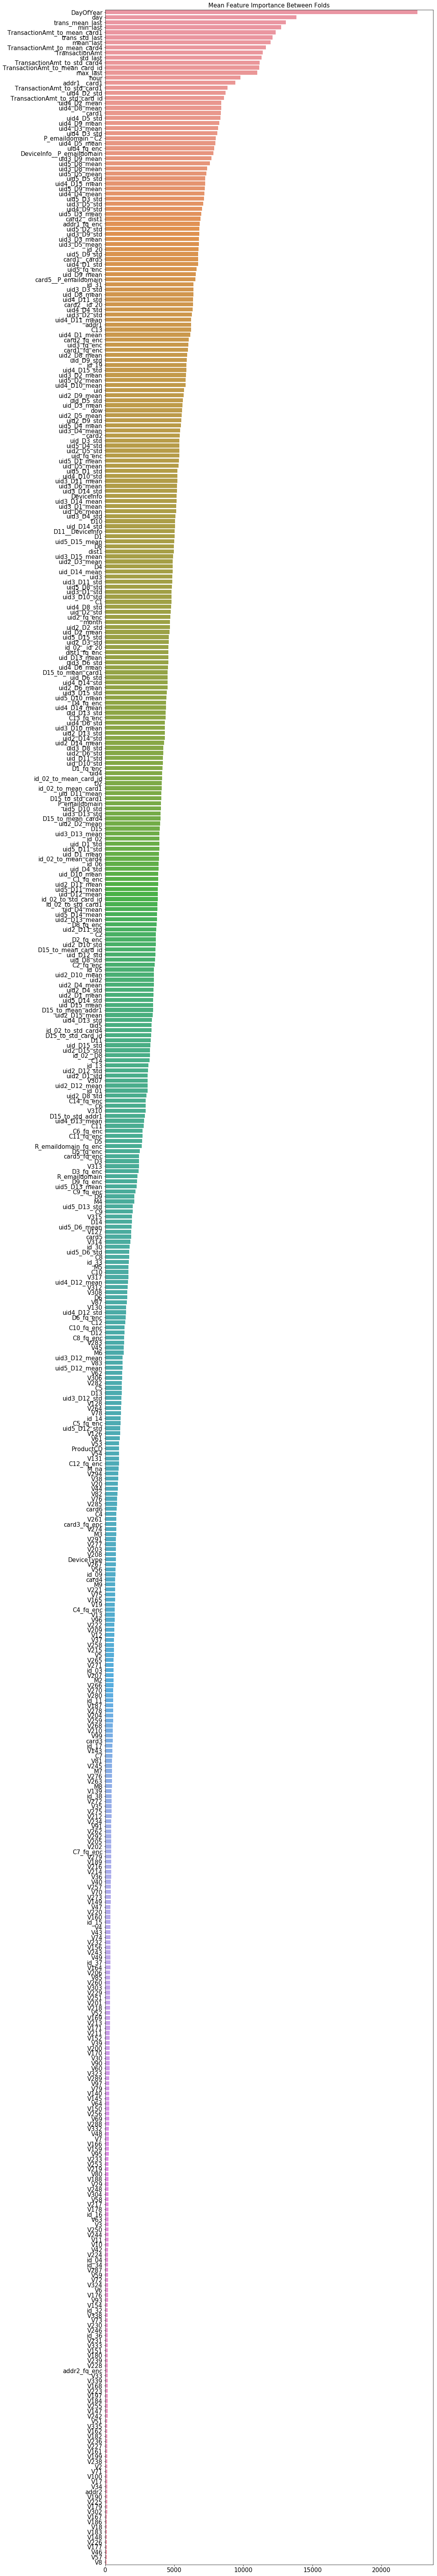

In [5]:
importance = pd.read_csv('../input/dropsomecol/importance_190901.csv',index_col ='Unnamed: 0')
importance.to_csv()
importance['Mean_Importance'] = importance.sum(axis=1) / 5
importance.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 120))
sns.barplot(x='Mean_Importance', y=importance.index, data=importance)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Mean Feature Importance Between Folds', size=15)

plt.show()